## Objectif : Prédire si un patient a le diabète ou non à partir de certaines attributs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
## Valeurs manquantes
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
## Description statistiques
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


## Visualisation des données

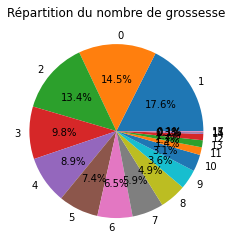

In [8]:
plt.pie(df['Pregnancies'].value_counts(), labels=['1','0','2','3','4','5','6','7','8','9','10','11','13','12','14','15','17'],\
       autopct="%.1f%%")
plt.title('Répartition du nombre de grossesse');

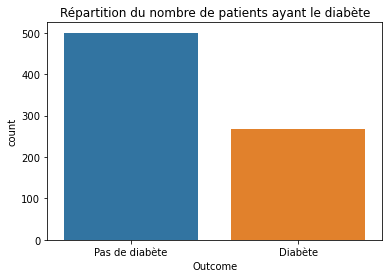

In [9]:
sns.countplot(x='Outcome', data=df)
plt.xticks(range(2),['Pas de diabète', 'Diabète'])
plt.title('Répartition du nombre de patients ayant le diabète');

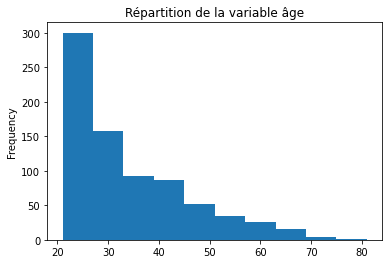

In [10]:
df.Age.plot.hist()
plt.title('Répartition de la variable âge');

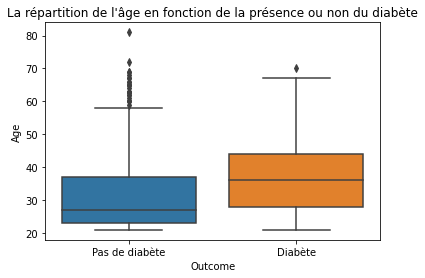

In [11]:
sns.boxplot(x=df.Outcome, y=df.Age)
plt.xticks(range(2),['Pas de diabète', 'Diabète'])
plt.title("La répartition de l'âge en fonction de la présence ou non du diabète");

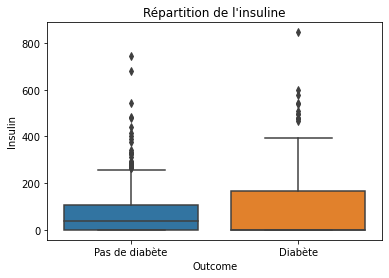

In [12]:
sns.boxplot(x=df.Outcome, y=df.Insulin)
plt.title("Répartition de l'insuline")
plt.xticks(range(2), ['Pas de diabète', 'Diabète']);

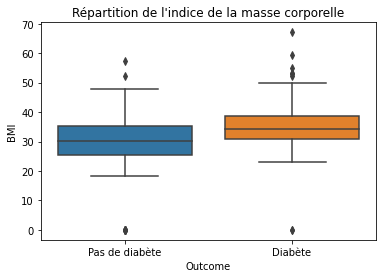

In [13]:
sns.boxplot(x=df.Outcome, y=df.BMI)
plt.title("Répartition de l'indice de la masse corporelle")
plt.xticks(range(2), ['Pas de diabète', 'Diabète']);

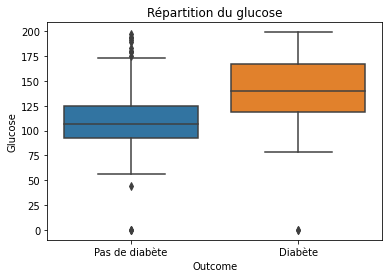

In [14]:
sns.boxplot(y=df['Glucose'],x=df['Outcome'])
plt.xticks(range(2), ['Pas de diabète','Diabète'])
plt.title('Répartition du glucose');

## Modélisation

In [15]:
## Application de get_dummies
df = pd.get_dummies(df, drop_first=True)

In [16]:
## Normalisation des données
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X1 = df.drop('Outcome', axis=1)
y = df['Outcome']

X = scaler.fit_transform(X1)
X_scaled = pd.DataFrame(X, columns=X1.columns, index=df.index)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 

In [20]:
## Tester plusieurs modèles par validation croisée
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('svc', SVC(gamma='auto', random_state = 12345)))
models.append(('DTC', DecisionTreeClassifier(random_state=12345)))
models.append(('RF', RandomForestClassifier(random_state=12345)))

In [21]:
resultats = []
nom_modeles = []

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=42, test_size=0.2)

for nom, modele in models:
    cv_result = cross_val_score(modele, X_train, y_train, cv=10, scoring='accuracy')
    resultats.append(cv_result)
    nom_modeles.append(nom)
    print(nom, " : ",cv_result.mean())

LR  :  0.76544156530936
KNN  :  0.7525912215758856
svc  :  0.7621364357482813
DTC  :  0.7296404019037547
RF  :  0.7702273929138022


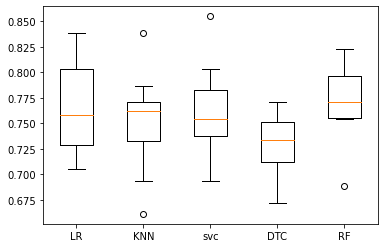

In [22]:
## Analyser les résultats des modèles testés
plt.boxplot(resultats)
plt.xticks(range(1,6), nom_modeles);

## RandomForestClassifier

In [24]:
## Optimisation du modèle avec le meilleur score
rf_params={"n_estimators":[100,200],"max_features":[3,5], "min_samples_split": [2,5],"max_depth":[3,None]}
rf_model = RandomForestClassifier(random_state=12345)

grille = GridSearchCV(estimator=rf_model, param_grid=rf_params, scoring="accuracy", cv=10)
grille.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'max_depth': [3, None], 'max_features': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [25]:
pd.DataFrame(grille.cv_results_)[['params','mean_test_score']]

,params,mean_test_score
0,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.755632
1,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.754019
2,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.753993
3,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.755632
4,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",0.763723
5,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",0.763749
6,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",0.763723
7,"{'max_depth': 3, 'max_features': 5, 'min_sampl...",0.763749
8,"{'max_depth': None, 'max_features': 3, 'min_sa...",0.760497
9,"{'max_depth': None, 'max_features': 3, 'min_sa...",0.760497


In [33]:
## Les meilleurs paramètres
print(grille.best_score_)
print(grille.best_params_)

0.7783976731887889
{'max_depth': None, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [46]:
## Entraînement du modèle avec les paramètres retenus
# rf_best = RandomForestClassifier(**grille.best_params_)
rf_best = RandomForestClassifier(max_features=3, min_samples_split=5, n_estimators=100)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_features=3, min_samples_split=5)

In [47]:
cross_val_score(rf_best, X_train, y_train, cv=10).mean()

0.7719196192490745

<AxesSubplot:>

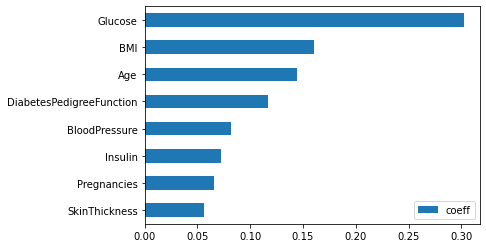

In [48]:
## Afficher l'importance de chaque variable
pd.DataFrame(rf_best.feature_importances_, index=X_scaled.columns).rename({0:'coeff'}, axis=1).sort_values('coeff').plot.barh()